In [1]:
from os import listdir
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score

In [3]:
category = listdir("./101_ObjectCategories/")
path_images = []

for i in category:
    images = listdir("./101_ObjectCategories/"+str(i))
    for j in images:
        path_images.append(("./101_ObjectCategories/"+str(i)+"/"+str(j),i))

In [4]:
path_images = np.array(path_images)
path_images.shape
path_images[:,0][0]

'./101_ObjectCategories/accordion/image_0024.jpg'

(1292, 128)
(1292,)


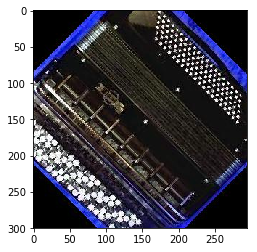

(824, 128)
(824,)


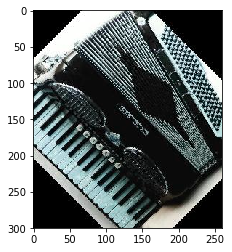

In [5]:
img = cv.imread(path_images[:,0][0])
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)    
sift = cv.xfeatures2d.SIFT_create()
kp, desc = sift.detectAndCompute(gray,None)
print(np.shape(desc))
print(np.shape(kp))
plt.imshow(img)
plt.show()

img = cv.imread(path_images[:,0][1])
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)    
sift = cv.xfeatures2d.SIFT_create()
kp, desc = sift.detectAndCompute(gray,None)
print(np.shape(desc))
print(np.shape(kp))
plt.imshow(img)
plt.show()

In [6]:
Y = []
X = []

N = len(path_images)

pbar = tqdm(total = N)
for i in range(N):
    img = cv.imread(path_images[i,0])
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)    
    sift = cv.xfeatures2d.SIFT_create()
    kp, desc = sift.detectAndCompute(gray,None)
    Y.append(path_images[i,1])
    X.append(desc)
    pbar.update(1)
    
pbar.close()

100%|██████████| 9144/9144 [03:08<00:00, 48.46it/s]


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size=0.7, random_state=True)

In [11]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_train[0].shape)
print(X_train[1].shape)
print(X_train[2].shape)
print(X_train[3].shape)
print(X_train[4].shape)
print(Y_train.shape)
print(X_test.shape)
print(X_test.shape)

(531, 128)
(1417, 128)
(301, 128)
(291, 128)
(414, 128)
(6400,)
(2744,)
(2744,)


In [14]:
md = [10]

for i in md:
    kmeans = KMeans(n_clusters=5).fit(X_train)
    labels = kmeans.labels_
    labels = labels.reshape(img.shape)

ValueError: setting an array element with a sequence.